# ロバスト最適化における不確実集合の推定

参考
* [Learning-based Robust Optimization: Procedures and Statistical Guarantees](https://arxiv.org/abs/1704.04342)

ロバスト最適化では不確実集合全てにおいて制約を満たすような最適化を目指しますが，不確実集合の選択の仕方次第で性能がだいぶ変わります．
今回は，集めたデータから不確実集合を推定する手法について見てみます．

次のチャンス制約問題を考えましょう（これを式(1)とします）．
$$
\text { minimize } f(x) \text { subject to } P(g(x ; \xi) \in \mathcal{A}) \geq 1-\epsilon
$$

ここで，

* $f(x) \in \mathbb{R}$は目的関数
* $x \in \mathbb{R}^d$は決定変数
* $\xi \in \mathbb{R}^m$は確率測度$P$に従う不確実ベクトル
* $g(x ; \xi): \mathbb{R}^d \times \mathbb{R}^m \rightarrow \Omega$と$\mathcal{A} \subset \Omega$が制約ようの表記です．

つまり，なにか$\xi$が$P$にしたがって出てきたあとで，それが制約を満たす確率は$1-\epsilon$以上であることを保証しています．
これをそのまま解くのは結構難しいです（チャンス制約の評価は一般にNP困難です）．

その代わりに，次のロバスト最適化問題を考えましょう．（これを式(2)とします）．

$$
\text { minimize } f(x) \text { subject to } g(x ; \xi) \in \mathcal{A} \quad \forall \xi \in \mathcal{U}
$$

これは，明らかに$\xi \in \mathcal{U}$であるような$\xi$については制約を満たしていることがわかります．よって，$\mathcal{U}$が$\xi$のうち$1-\epsilon$以上の確率で出る範囲をカバーしていれば良さそうです．
つまり，$P(\xi \in \mathcal{U}) \geq 1-\epsilon$なる$\mathcal{U}$を見つけることを考えましょう（これを$(1-\epsilon)$-content setと呼びます）．実際，これは元の問題の実行可能解を見つけます：

---

**補題１**

$(1-\epsilon)$-content setであるような$\mathcal{U}$を使ったときの式(2)の実行可能解は，式(1)の実行可能解でもある．

証明は省略します．

---


## 不確実集合の学習

表記
* データセット：$D=\left\{\xi_1, \ldots, \xi_n\right\}$
    * ここで，$\xi_i$は$P$からのサンプルです
* $\mathcal{U}(D)$：$D$から作った不確実集合

このとき，次を満たすような$\mathcal{U}(D)$を作るのが目標です（式(3)とします）．

$$
\mathbb{P}_D(P(\xi \in \mathcal{U}(D)) \geq 1-\epsilon) \geq 1-\delta
$$

ここで，$\mathbb{P}_D$はデータセット$D$について取った確率です．
これを使って$\mathcal{U}=\mathcal{U}(D)$とした式(2)の実行可能解は，式(1)において確率$1-\delta$以上で実行可能です．

---

**補題２**

(3)を満たす$\mathcal{U}$を使ったときの式(2)の実行可能解は，確率$1-\delta$以上で式(1)の実行可能解でもある．

証明は省略します．

---

この補題から，(3)を満たすような$\mathcal{U}$を見つければ良さそうです．
例えば単純に$\mathcal{U}(D)$を$P$のサポートと一致するように取ってしまえば(3)は満たされます．
しかし，これは明らかに保守的な解になってしまいます．そこで，次の指標に沿って$\mathcal{U}$を構築することを考えます：

1. $\mathcal{U}$は体積が小さくなるようにする．$\epsilon$が固定されているなら，$\mathcal{U}$が小さい≒$\xi$の出る確率が高い場所を$\mathcal{U}$がカバーしている　ことに注意しましょう．
2. $P(\xi \in \mathcal{U}(D))$が$1-\epsilon$となるべく一致するようにしたい．また，$\mathbb{P}_D(P(\xi \in \mathcal{U}(D)) \geq 1-\epsilon)$が$1-\delta$となるべく一致するようにしたい．
3. $\mathcal{U}$はロバスト最適化で扱いやすい形にしたい



---

**$\mathcal{U}$の作り方**

そこで，次の２つのフェーズによって$\mathcal{U}$を作ってみます．

まず，$D$を２つのグループ$D_1$と$D_2$に分けます．それぞれのサイズを$n_1$と$n_2$とします．
* $D_1=\left\{\xi_1^1, \ldots, \xi_{n_1}^1\right\}$ and $D_2=\left\{\xi_1^2, \ldots, \xi_{n_2}^2\right\}$です．

今回は$\mathcal{U}$に楕円を使う場合だけ紹介します．

**フェーズ１**

$D_1$を使って，$\mathcal{U}$の「形状」を決めます．特に楕円の場合は，

$$\mathcal{S}=\left\{(\xi-\mu)^{\prime} \Sigma^{-1}(\xi-\mu) \leq \rho\right\}$$ 

とします．ここで$\rho>0$はハイパラで，後で決めます．例えば$\mu$と$\Sigma$は$D_1$の平均値と共分散行列を使います．

**フェーズ２**

$D_2$を使って，フェーズ１で作った$\mathcal{U}$の「大きさ」を調整します．
ここで，$P(\xi \in \mathcal{U}(D)) \approx 1-\epsilon$ with coverage $\approx 1-\delta$になるようにします．

そのために，まず，フェーズ１で作った$\mathcal{U}$を$\{\xi: t(\xi) \leq s\}$の形式で表します．ここで，$t(\cdot): \mathbb{R}^m \rightarrow \mathbb{R}$は適切なマップ関数です．
例えば楕円の場合は
$$t(\xi)=(\xi-\mu)^{\prime} \Sigma^{-1}(\xi-\mu)$$
であり，フェーズ１の集合は$\{\xi: t(\xi) \leq \rho\}$と同じです．

そして，$s$を次のようにして決定します．

まず，$$t\left(\xi_{(1)}^2\right)<t\left(\xi_{(2)}^2\right)<\dots<t\left(\xi_{\left(n_2\right)}^2\right)$$
を$\left\{t\left(\xi_i^2\right)\right\}_{i=1, \ldots, n_2}$についての順序統計量（wiki参照）として，

$$
i^*=\min \left\{r: \sum_{k=0}^{r-1}\left(\begin{array}{c}
n_2 \\
k
\end{array}\right)(1-\epsilon)^k \epsilon^{n_2-k} \geq 1-\delta, 1 \leq r \leq n_2\right\}
$$

とします．
これは$1-(1-\epsilon)^{n_2} \geq 1-\delta$である場合は見つかります（つまり$n_2 \geq \log \delta / \log (1-\epsilon)$です）．
そして，

$$s=t\left(\xi_{\left(i^*\right)}^2\right)$$
とします．

---

**$s$の選び方について**

次の補題が成立します：

* $Y_1, \dots, Y_{n_2}$を$\mathbb{R}$における連続な分布からのi.i.d.なデータとする．
* $Y_{(1)} < Y_{(2)}<\cdots<Y_{\left(n_2\right)}$を，その順序統計量とする．

このとき，

$$
i^*=\min \left\{r: \sum_{k=0}^{r-1}\left(\begin{array}{c}
n_2 \\
k
\end{array}\right)(1-\epsilon)^k \epsilon^{n_2-k} \geq 1-\delta, 1 \leq r \leq n_2\right\}
$$

について，$Y_{\left(i^*\right)}$は$Y$が従う分布の，確率$1-\delta$の$(1-\epsilon)$分位点の信頼上界である．

もし$1-(1-\epsilon)^{n_2}<1-\delta$の場合は，どの$Y_{(r)}$も有効な信頼上界にならない．

下界についても同じように言えるが省略．

**証明**

$q_{1-\epsilon}$を$(1-\epsilon)$分位点とします．
$F(y)=P(Y\leq y)$ と $\bar{F}(y)=P(Y> y)$をそれぞれ$Y_i$についての分布関数と，（裾？）分布関数とする．

このとき，

$$
\begin{aligned}
P\left(Y_{(r)} \geq q_{1-\epsilon}\right) & =P\left(r-1番目以下のデータ\left\{Y_1, \ldots, Y_n\right\} \text { が }<q_{1-\epsilon}\right) \\
& =\sum_{k=0}^{r-1}\left(\begin{array}{c}
n_2 \\
k
\end{array}\right) F\left(q_{1-\epsilon}\right)^k \bar{F}\left(q_{1-\epsilon}\right)^{n_2-k} \\
& =\sum_{k=0}^{r-1}\left(\begin{array}{c}
n_2 \\
k
\end{array}\right)(1-\epsilon)^k \epsilon^{n_2-k}
\end{aligned}
$$

が成立します（これの導出は[これとか](https://nounai-librarian.com/2020-07-22-052207/)参照）

よって，どの$\sum_{k=0}^{r-1}\left(\begin{array}{c}n_2 \\ k\end{array}\right)(1-\epsilon)^k \epsilon^{n_2-k} \geq 1-\delta$を満たす$r$も$1-\delta$以上の確率で$q_{1-\epsilon}$の上界であり，$i^*$はその中の一番小さいものを選んだことになります．

もし$\sum_{k=0}^{n_2-1}\left(\begin{array}{c}n_2 \\ k\end{array}\right)(1-\epsilon)^k \epsilon^{n_2-k}<1-\delta$ならば，上界になり得る$r$は存在しません．

---


以上を踏まえると，次の定理が成立します：

**定理１**

* $D$を$P$から取ってきたi.i.d.なデータセットとする．
* $D$を$D_1=\left\{\xi_i^1\right\}_{i=1, \ldots, n_1}$ and $D_2=\left\{\xi_i^2\right\}_{i=1, \ldots, n_2}$に分割する．
* $n_2 \geq \log \delta / \log (1-\epsilon)$とする．
* $\mathcal{U}=\mathcal{U}(D)=\{\xi: t(\xi) \leq s\}$として不確実集合を構築する．
    * ここで$t: \mathbb{R}^m \rightarrow \mathbb{R}$は$D_1$から作ったマップ関数
    * $s=t\left(\xi_{\left(i^*\right)}^2\right)$は$D_2$によって計算された値であり，$i^*$は上で定義したとおり．

このとき，$\mathcal{U}$は式(3)を満たす．

**証明**

まず，$\mathcal{U}=\left\{\xi: t(\xi) \leq t\left(\xi_{\left(i^*\right)}^2\right)\right\}$なので，

$$P(\xi \in \mathcal{U}(D))=P\left(t(\xi) \leq t\left(\xi_{\left(i^*\right)}^2\right)\right)$$
です．これを使うと，

$D_1$と$D_2$は独立なので，

$$
\mathbb{P}_{D_2}\left(P(\xi \in \mathcal{U}(D)) \geq 1-\epsilon \mid D_1\right)=\mathbb{P}_{D_2}\left(P\left(t(\xi) \leq t\left(\xi_{\left(i^*\right)}^2\right)\right) \geq 1-\epsilon \mid D_1\right)=\mathbb{P}_{D_2}\left(q_{1-\epsilon} \leq t\left(\xi_{\left(i^*\right)}^2\right) \mid D_1\right) \geq 1-\delta
$$

が成立します．（ここで$q_{1-\epsilon}$ は $t(\xi)$の$(1-\epsilon)$分位点です．）

また，これはどんな$D_1$についても成立するので，両側から$D_1$について期待値を取ると，

$$
\mathbb{E}_{D_1}\left[\mathbb{P}_{D_2}\left(P(\xi \in \mathcal{U}(D)) \geq 1-\epsilon \mid D_1\right)\right] \geq 1-\delta
$$

が成り立ちます．よって，tower-ruleから

$$
\mathbb{P}_D(P(\xi \in \mathcal{U}(D)) \geq 1-\epsilon) \geq 1-\delta
$$

です．

---

**$n_2$がたくさん必要な直感**

少なくとも１つの順序統計量を選択することで分位点の上界を得るには，分位点を確率$1-\delta$以上で上から抑えるデータが少なくとも１つ必要になります．よって，

$$
P\left(\text { at least one } t\left(\xi_i^2\right) \geq(1-\epsilon) \text {-quantile }\right) \geq 1-\delta
$$

が必要であり，これは$1-(1-\epsilon)^{n_2} \geq 1-\delta$と同じです．




---

さて，$\mathcal{U}$に期待する性質の２つめを思い出しましょう．次が成立します：

**定理２**

Theorem 1と同じ仮定のもと，$D_1$について条件付けされたとき，

1. $n_2\to\infty$で$P(\xi \in \mathcal{U}) \rightarrow 1-\epsilon$に確率収束します
2. $\mathbb{P}_{D_2}\left(P(\xi \in \mathcal{U}) \geq 1-\epsilon \mid D_1\right) \rightarrow 1-\delta$ as $n_2 \rightarrow \infty$

が成り立ちます．

これは有限サンプルについては特に何も言えないことに注意しましょう．実際，

$$
1-\delta_{\text {theoretical }}=\mathbb{P}_D(P(\xi \in \mathcal{U}) \geq 1-\epsilon)=\sum_{k=0}^{i^*-1}\left(\begin{array}{c}
n_2 \\
k
\end{array}\right)(1-\epsilon)^k \epsilon^{n_2-k}
$$

であり，この量は$n_2$について単調ではないために生じます（論文のFigure EC.1とか見てください）



ほんとにできるのか実験してみましょう．

0.9904935828503946
500 420


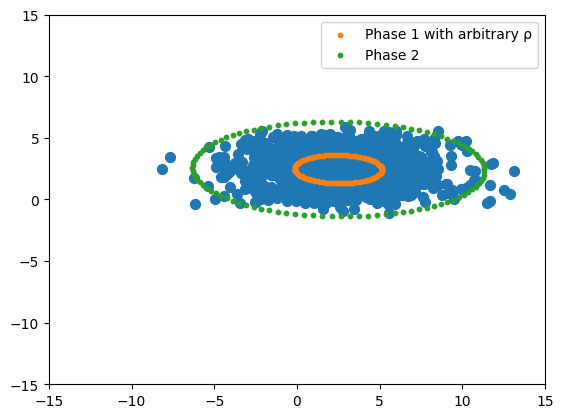

In [101]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.patches as patches

m = 1000
D = np.random.randn(m, 2)
D[:, 0] = D[:, 0] * np.random.rand() * 3
D[:, 1] = D[:, 1] * np.random.rand() * 3
D = D + np.random.rand(m, 2) * 5

delta = 0.01
epsilon = 0.2
n2 = np.log(delta) / (np.log(1 - epsilon))
# n2 = int(n2) + 1
n2 = 500
assert n2 < m

D1 = D[n2:]
D2 = D[:n2]

# データの描画
plt.xlim(-15, 15)
plt.ylim(-15, 15)
x, y = D[:, 0], D[:, 1]
plt.scatter(x, y, s=50)


def plot_ellipsoid(s, mu, H, label):
    L = np.linalg.cholesky(H)  # MVEEでやったコレスキー分解を使います
    theta = np.linspace(0, 2 * np.pi, 100)
    x = np.cos(theta)
    y = np.sin(theta)
    L_T = np.linalg.inv(L).T
    x2, y2 = [], []
    for _x, _y in zip(x, y):
        v = mu + np.sqrt(s) * np.sqrt(2) * np.dot(L_T, np.array([_x, _y]))
        x2.append(v[0])
        y2.append(v[1])
    plt.scatter(x2, y2, s=10, label=label)


# フェーズ１です
mu = D1.mean(axis=0)
Sigma = np.zeros((2, 2))
for xi in D1:
    Sigma += (xi - mu).reshape(2, 1) @ (xi - mu).reshape(1, 2)
Sigma = Sigma / D1.shape[0]
H = np.linalg.inv(Sigma)

# 楕円の描画
s = 0.3
plot_ellipsoid(s, mu, H, "Phase 1 with arbitrary ρ")

# フェーズ２です

X = 0
X = math.comb(n2, 0) * (epsilon ** n2)
for k in range(1, n2):
    X += math.comb(n2, k) * ((1 - epsilon) ** k) * (epsilon ** (n2 - k))
    if X >= 1 - delta:
        print(X)
        break

i_star = max(1, k)
print(n2, i_star)
t_xi2 = np.zeros(n2)
for i in range(n2):
    t_xi2[i] = (D[i] - mu).T @ H @ (D[i] - mu)
t_xi2 = np.sort(t_xi2)
s = t_xi2[i_star + 1]
plot_ellipsoid(s, mu, H, "Phase 2")

plt.legend()
